In [20]:
! pip install -q -r requirements.txt

In [21]:
import pandas as pd

%matplotlib inline

In [22]:
file = "data/Telco-Customer-Churn.csv"

df = pd.read_csv(file)

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# Turn 'Churn' object to float. Replace Yes with 1 and No with 0.

df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [28]:
df['Churn'].unique()

array([0, 1], dtype=int64)

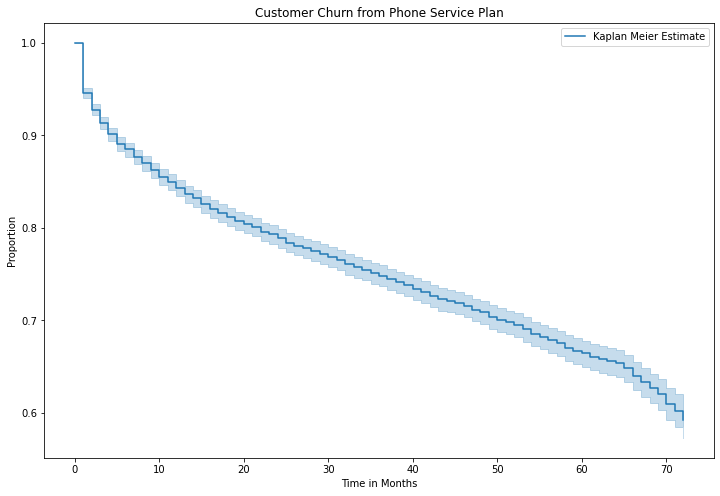

In [31]:
# Event ('Churn') is defined as the time at which the customer churns / unsubscribes
# Time of origin ('tenure') is when the customer began their phone plan with the company
# Determining churn with all data (no cohorts)

from lifelines import KaplanMeierFitter

durations = df["tenure"]
event_observed = df["Churn"]
# Create a kmf object
kmf = KaplanMeierFitter() 
# Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')
# Create an estimate
kmf.plot(ci_show=True)

from matplotlib import pyplot as plt

plt.title('Customer Churn from Phone Service Plan');
plt.xlabel('Time in Months');
plt.ylabel('Proportion');
plt.rcParams['figure.figsize'] = [12, 8];

<AxesSubplot:xlabel='timeline'>

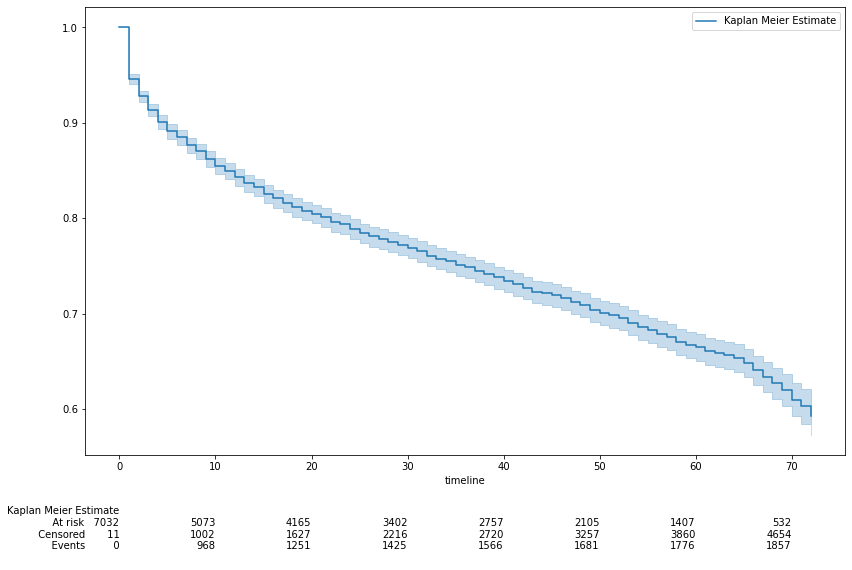

In [32]:
kmf.plot(at_risk_counts=True)

In [33]:
import lifelines

lifelines.utils.qth_survival_time(.8, kmf)

C:\Users\patri\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


22.0

In [34]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

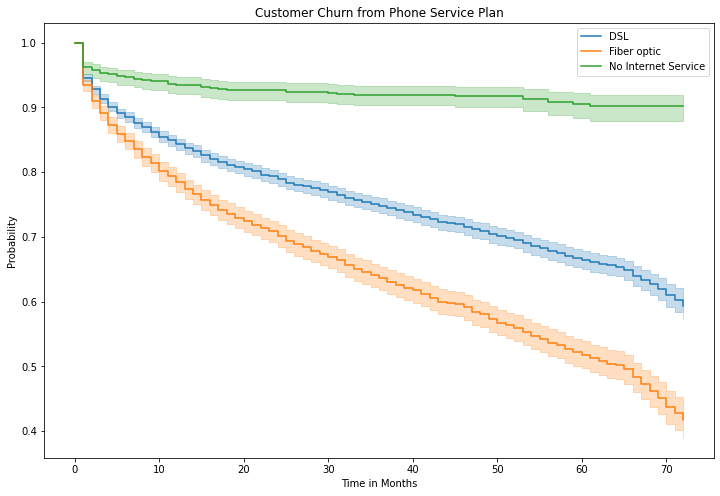

In [35]:
kmf1 = KaplanMeierFitter()

T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored

## Three Cohorts are compared.
groups = df['InternetService']
i1 = (groups == 'DSL')
i2 = (groups == 'Fiber optic')
i3 = (groups == 'No')

## fit the model for 1st cohort.
kmf1.fit(T[i1], E[i1])
ax = kmf.plot(label='DSL')

## fit the model for 2nd cohort.
kmf1.fit(T[i2], E[i2])
ax1 = kmf1.plot(ax = ax, label='Fiber optic')

## fit the model for 3rd cohort.
kmf1.fit(T[i3], E[i3])
kmf1.plot(ax=ax1, label='No Internet Service')

plt.title('Customer Churn from Phone Service Plan');
plt.xlabel('Time in Months');
plt.ylabel('Probability');